#### Objective: With the Kaggle Dataset 'BankChurners' will try to predict bank customers churn.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max.columns', 100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler



### Data Exploration


In [2]:
df=pd.read_csv("./BankChurners.csv") #Find this Kaggle Dataset in the Data Files of my github
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


In [9]:
for col in df.select_dtypes(['object']).columns:
    print(col, '\n')
    print('Valores unicos: ', df[col].nunique())
    print(df[col].value_counts())
    print('-------------')
    

Attrition_Flag 

Valores unicos:  2
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
-------------
Gender 

Valores unicos:  2
F    5358
M    4769
Name: Gender, dtype: int64
-------------
Education_Level 

Valores unicos:  7
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
-------------
Marital_Status 

Valores unicos:  4
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
-------------
Income_Category 

Valores unicos:  6
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
-------------
Card_Category 

Valores unicos:  4
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
-------------


##### Null

In [10]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Education Level:

Text(0, 0.5, '% Customers')

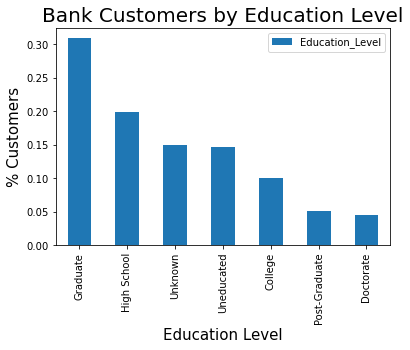

In [13]:
ax=df["Education_Level"].value_counts(normalize=True).plot(kind="bar")
plt.legend()
ax.set_title('Bank Customers by Education Level',fontsize=20)
ax.set_xlabel('Education Level',fontsize=15)
ax.set_ylabel('% Customers',fontsize=15)

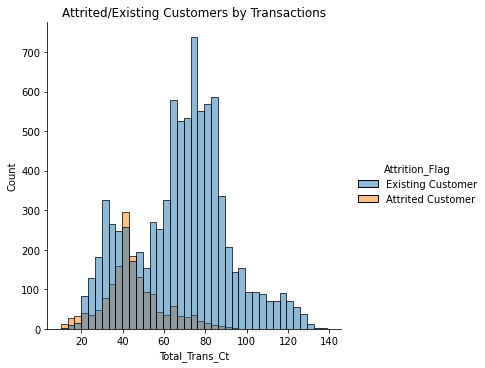

In [12]:
ax = sns.displot(data=df,
           x=df.Total_Trans_Ct,
           hue=df.Attrition_Flag)
ax.set(title = 'Attrited/Existing Customers by Transactions')

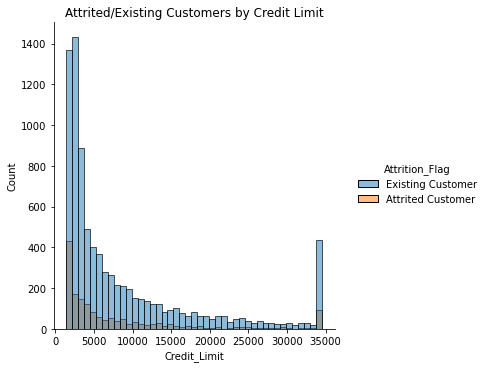

In [14]:
ax = sns.displot(data=df,
           x=df.Credit_Limit,
           hue=df.Attrition_Flag)
ax.set(title = 'Attrited/Existing Customers by Credit Limit')

In [15]:
df_atr=df[df["Attrition_Flag"]=="Attrited Customer"] #only attrited customers

In [16]:
df_atr["Income_Category"].value_counts()

Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: Income_Category, dtype: int64

In [17]:
df_atr["Income_Category"].value_counts(normalize=True)

Less than $40K   0.376
$40K - $60K      0.167
$80K - $120K     0.149
$60K - $80K      0.116
Unknown          0.115
$120K +          0.077
Name: Income_Category, dtype: float64

Text(0, 0.5, 'Number of attritions')

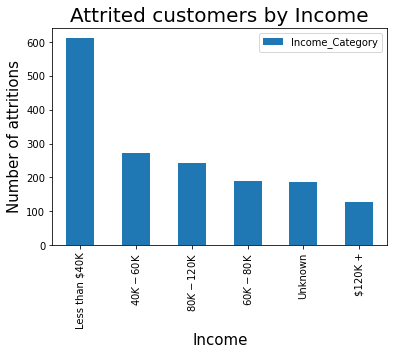

In [18]:
ax=df_atr["Income_Category"].value_counts().plot(kind="bar")
plt.legend()
ax.set_title('Attrited customers by Income',fontsize=20)
ax.set_xlabel('Income',fontsize=15)
ax.set_ylabel('Number of attritions',fontsize=15)

Text(0, 0.5, 'Number of attritions')

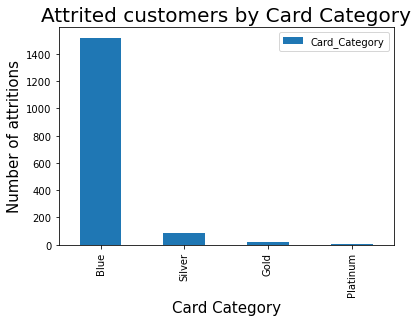

In [20]:
ax=df_atr["Card_Category"].value_counts().plot(kind="bar")
plt.legend()
ax.set_title('Attrited customers by Card Category',fontsize=20)
ax.set_xlabel('Card Category',fontsize=15)
ax.set_ylabel('Number of attritions',fontsize=15)

Text(0, 0.5, '% Attritions')

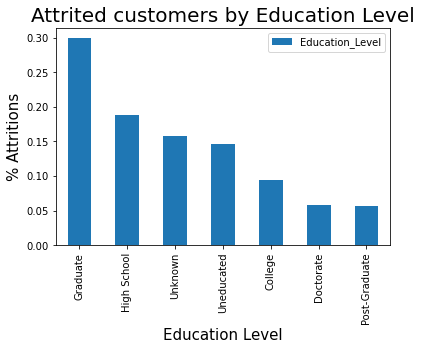

In [21]:
ax=df_atr["Education_Level"].value_counts(normalize=True).plot(kind="bar")
plt.legend()
ax.set_title('Attrited customers by Education Level',fontsize=20)
ax.set_xlabel('Education Level',fontsize=15)
ax.set_ylabel('% Attritions',fontsize=15)

Text(0, 0.5, 'Age')

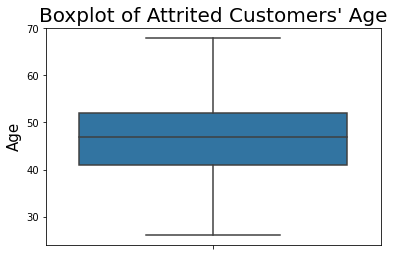

In [24]:


ax=sns.boxplot(y=df_atr["Customer_Age"]) #Boxplot de la base de relojes

ax.set_title("Boxplot of Attrited Customers' Age",fontsize=20)

ax.set_ylabel('Age',fontsize=15)

### Data Cleaning

 #### "Unknown" 

In [3]:
df_unk=df[df["Education_Level"]=="Unknown"]

In [4]:
df_unk.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,6,2,3,9095.000,1587,7508.000,1.433,1314,26,1.364,0.174
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.000,972,3262.000,1.707,1348,27,1.700,0.230
17,753327333,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,4,4,1,13535.000,1291,12244.000,0.653,1028,21,1.625,0.095
23,811604133,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.000,1560,932.000,0.573,1126,23,0.353,0.626


Text(0.5, 0, 'Income')

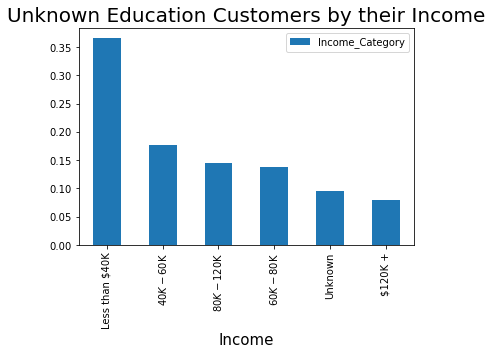

In [5]:
ax=df_unk["Income_Category"].value_counts(normalize=True).plot(kind="bar")
plt.legend()
ax.set_title('Unknown Education Customers by their Income',fontsize=20)
ax.set_xlabel('Income',fontsize=15)


Unknown data is replaced by a random selection:


Education Level


In [6]:
df.Education_Level=df.Education_Level.replace('Unknown', np.nan)

In [7]:
df.Education_Level.isnull().sum()

1519

In [8]:
df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [9]:
def random_edu(x):
    import random
    if pd.isnull(x):
        res=np.random.choice(df[df.Education_Level.notnull()]['Education_Level'])
    else:
        res=x
    return res

In [10]:
df['Education_Level']=df['Education_Level'].apply(random_edu)

In [11]:
df["Education_Level"].value_counts()

Graduate         3699
High School      2356
Uneducated       1760
College          1196
Post-Graduate     594
Doctorate         522
Name: Education_Level, dtype: int64

Income Category

In [12]:
df.Income_Category=df.Income_Category.replace('Unknown', np.nan)

In [13]:
df.Income_Category.isnull().sum()

1112

In [14]:
df["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [15]:
def random_inc(x):
   
    if pd.isnull(x):
        res=np.random.choice(df[df.Income_Category.notnull()]['Income_Category'])
    else:
        res=x
    return res

In [16]:
df['Income_Category']=df['Income_Category'].apply(random_inc)

In [17]:
df["Income_Category"].value_counts()

Less than $40K    4003
$40K - $60K       2008
$80K - $120K      1729
$60K - $80K       1566
$120K +            821
Name: Income_Category, dtype: int64

#### Correlation

<AxesSubplot:>

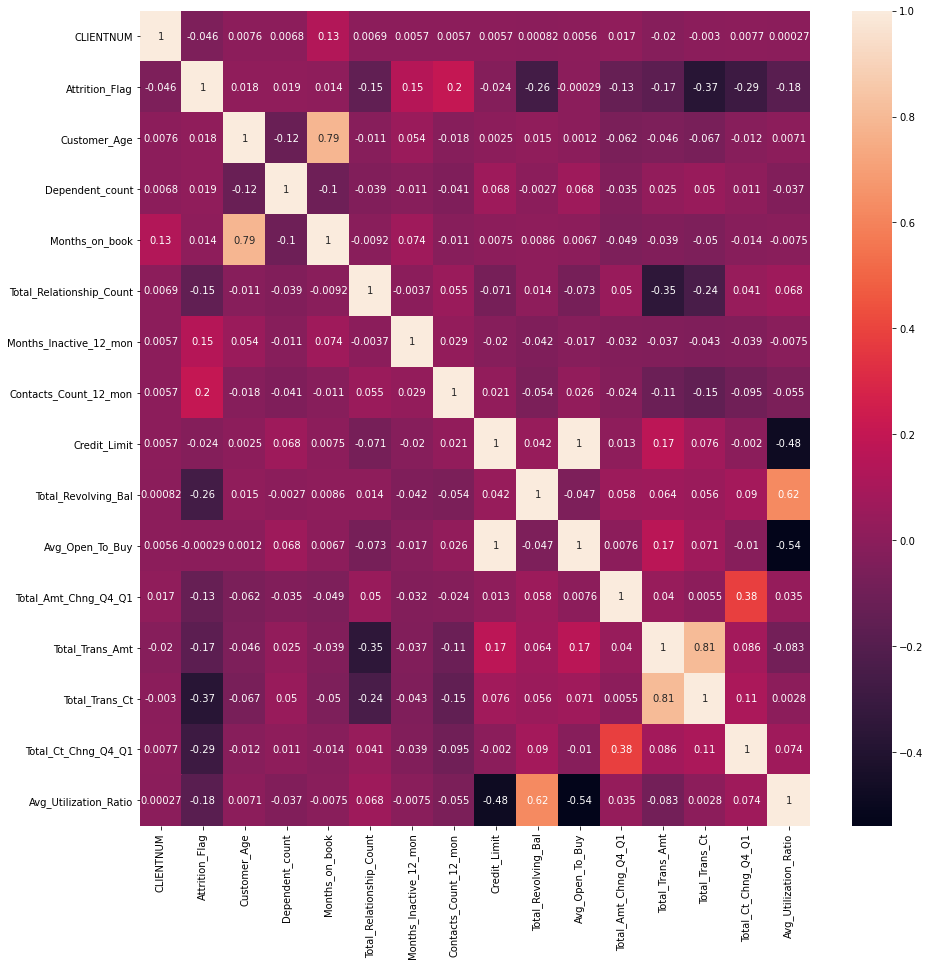

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
           annot=True)

In [18]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace('Existing Customer',0)
df['Attrition_Flag'] = df['Attrition_Flag'].replace('Attrited Customer',1) #To predict

In [19]:
df[["Attrition_Flag"]].value_counts()

Attrition_Flag
0                 8500
1                 1627
dtype: int64

<AxesSubplot:>

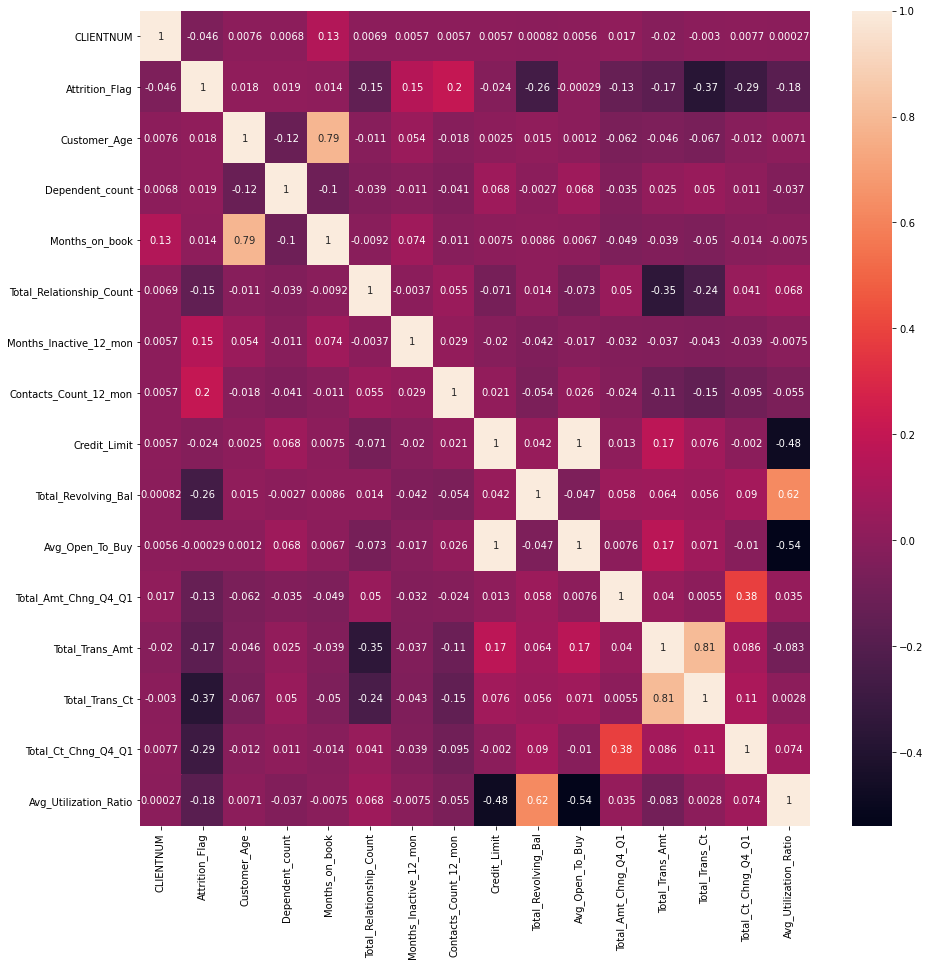

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
           annot=True)

One Hot Encoder in Card_Category

In [21]:
enc_card=OneHotEncoder()
cardcat=pd.DataFrame(enc_card.fit_transform(df[['Card_Category']]).toarray(), 
             columns=['Card_Blue', 'Card_Gold', 'Card_Platinum', "Card_Silver"])
df=df.join(cardcat)

In [114]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Blue,Card_Gold,Card_Platinum,Card_Silver
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,1.000,0.000,0.000,0.000
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,1.000,0.000,0.000,0.000
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,1.000,0.000,0.000,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,1.000,0.000,0.000,0.000
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,1.000,0.000,0.000,0.000


In [115]:
df["Card_Blue"].value_counts()

1.000    9436
0.000     691
Name: Card_Blue, dtype: int64


For the classification, will be considered only the category Card_Blue where the largest number of attrited customers 

In [22]:
df=df.drop(['Card_Silver','Card_Platinum','Card_Gold'], axis=1)

OrdinalEncoder in Income_Category

In [23]:
mapper = {'Less than $40K':1 ,  '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,  '$120K +':5}

In [24]:
df['Income_Code'] = df['Income_Category'].replace(mapper)

In [25]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Blue,Income_Code
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061,1.000,3
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105,1.000,1
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000,1.000,4
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760,1.000,1
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000,1.000,3



Education levels will be separated in 2 large groups: There is a lot of similarity in attrition behavior
 from the lowest levels and permanence at the highest.

In [26]:
map_ed = {'Uneducated':1 ,  'Graduate':1, 'High School':1, 'College':0,  'Doctorate':0, 'Post-Graduate':0}
df['Education_Code'] = df['Education_Level'].replace(map_ed)
df['Education_Code'].value_counts()

1    7815
0    2312
Name: Education_Code, dtype: int64

<AxesSubplot:>

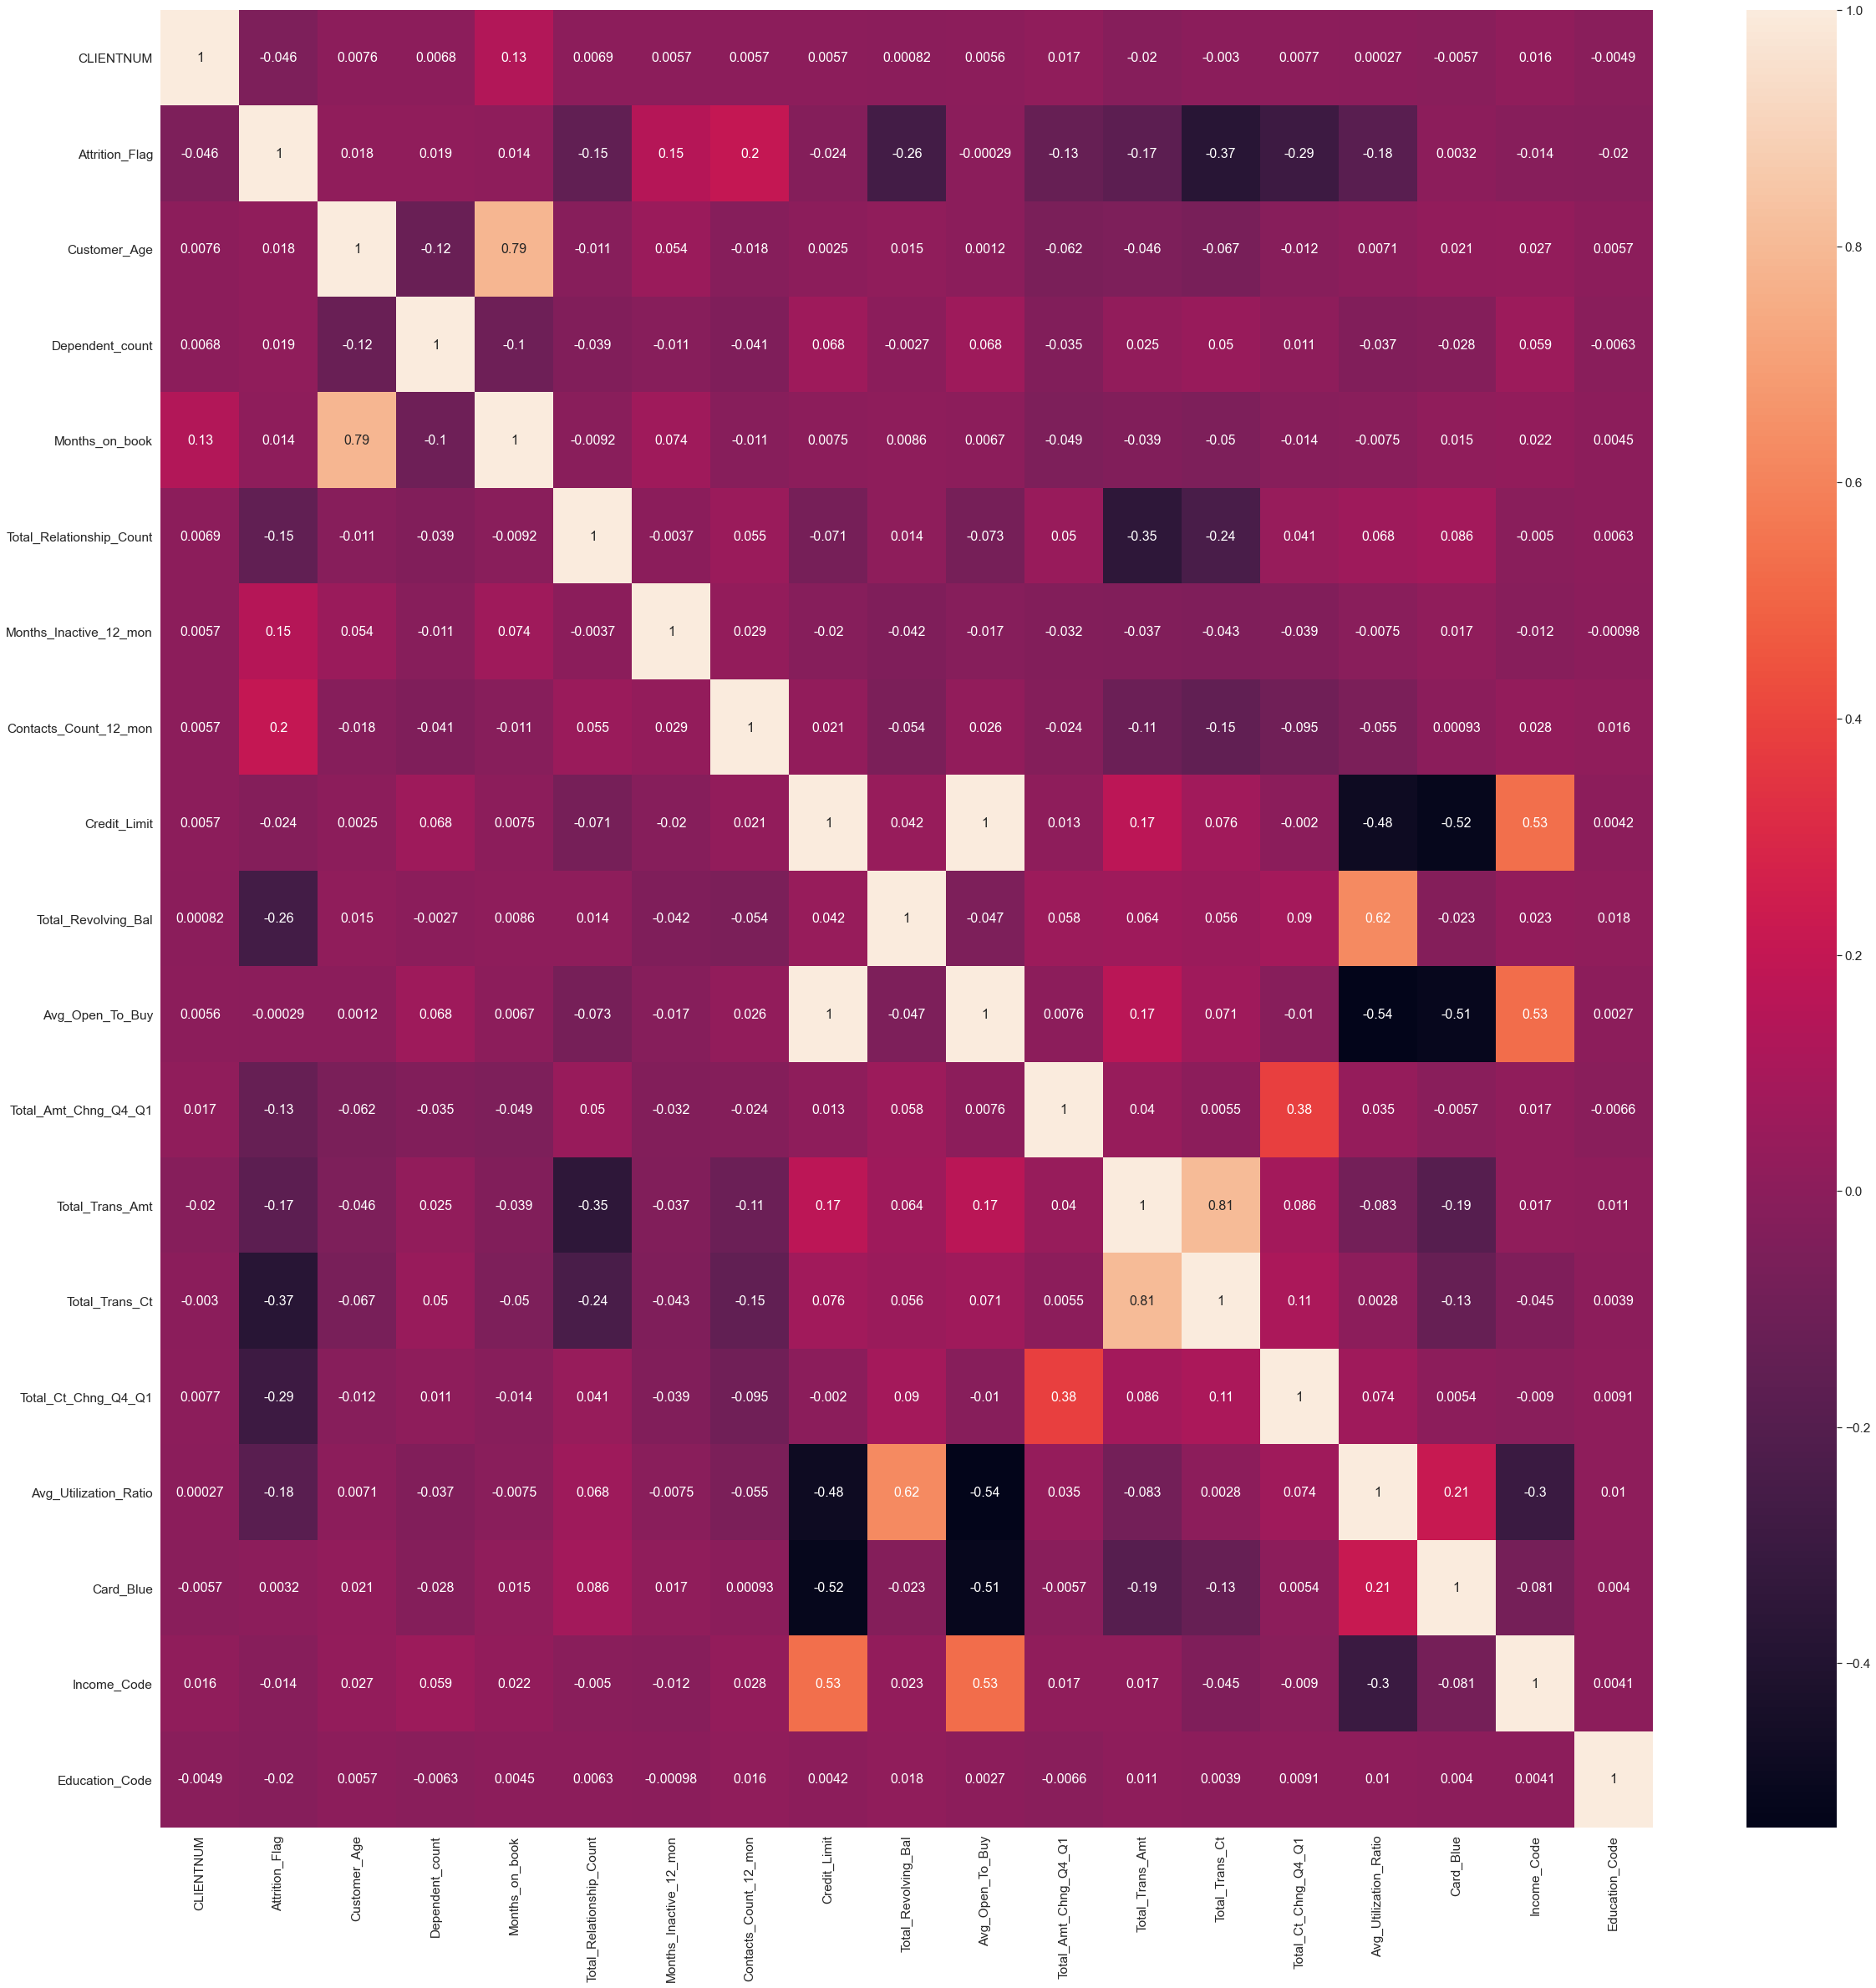

In [27]:
plt.figure(figsize=(40,40))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),
           annot=True,annot_kws={"size": 16})

#### In summary, the functions used are:


In [28]:
def sample_column(df,column):
    df[column] = df[column].replace('Unknown', np.nan)
    for i in df.index: 
        if df[column][i] == np.nan:
            df[column][i] == np.random.choice(df[df[column].notnull()][column])
    
    return df          
   
def le_attrition(df):
    df['Attrition_Flag'] = df['Attrition_Flag'].replace('Existing Customer',0)
    df['Attrition_Flag'] = df['Attrition_Flag'].replace('Attrited Customer',1)
    return df

def transform_edu(df):
    map_ed = {'Uneducated':1 ,  'Graduate':1, 'High School':1, 'College':0,  'Doctorate':0, 'Post-Graduate':0}
    df['Education_Code'] = df['Education_Level'].replace(map_ed)
    return df

def transform_inc(df):
    mapper = {'Less than $40K':1 ,  '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,  '$120K +':5}
    df['Income_Code'] = df['Income_Category'].replace(mapper)
    return df

def transform_tcard(df):
    enc_card = OneHotEncoder()
    cardcat = pd.DataFrame(enc_card.fit_transform(df[['Card_Category']]).toarray(), 
    columns = ['Card_Blue', 'Card_Gold', 'Card_Platinum', "Card_Silver"])
    df = df.join(cardcat)
    df = df.drop(['Card_Silver','Card_Platinum','Card_Gold'], axis=1)
    return df


#### Preprocess

In [29]:
def preprocess(df):
    df = sample_column(df,'Education_Level')
    df = sample_column(df,'Income_Category')
    df = le_attrition(df)
    df =  transform_edu(df)
    df = transform_inc(df)
    df = transform_tcard(df)
    
    return df
    
    

### Modeling


Considering the previous analysis, the columns to use for modeling are: ['Total_Trans_Ct','Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Income_Code','Card_Blue','Education_Code']

In [30]:
X=df[['Total_Trans_Ct','Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Income_Code','Card_Blue','Education_Code']] 

In [31]:
y=df['Attrition_Flag']

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=33)

In [33]:
X_train.shape

(8101, 6)

In [34]:
print('Data for training: ', len(X_train))
print('Data for test: ', len(X_test))

Data for training:  8101
Data for test:  2026


##### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logist = LogisticRegression()
logist.fit(X_train, y_train)

C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
print('Coefficients vector: ', logist.coef_)
print('Intercept (W0): ', logist.intercept_)

Coefficients vector:  [[-4.81387395e-02 -9.20800660e-04 -3.32236247e+00  1.38470865e-02
   6.06463147e-02  1.52492149e-01]]
Intercept (W0):  [3.9054513]


In [37]:
y_pred_train = logist.predict(X_train)

In [38]:
logist.score(X_train, y_train)

0.8819898777928651

In [39]:
y_pred_test = logist.predict(X_test)

In [40]:
logist.score(X_test, y_test)

0.8830207305034551

In [41]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_test)))

Accuracy Score : 0.8830207305034551
Precision Score : 0.7150837988826816
Recall Score : 0.40764331210191085
F1 Score : 0.5192697768762677


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[1661,   51],
       [ 186,  128]], dtype=int64)

#### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
knn.score(X_train, y_train)

0.9098876681891125

In [45]:
knn.fit(X_test, y_test)

KNeighborsClassifier()

In [46]:
knn.score(X_test, y_test)

0.9072063178677197

In [47]:
y_knn_test = knn.predict(X_test)

In [48]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_knn_test)))
print('Precision Score : ' + str(precision_score(y_test,y_knn_test)))
print('Recall Score : ' + str(recall_score(y_test,y_knn_test)))
print('F1 Score : ' + str(f1_score(y_test,y_knn_test)))

Accuracy Score : 0.9072063178677197
Precision Score : 0.7603305785123967
Recall Score : 0.5859872611464968
F1 Score : 0.6618705035971223


In [49]:
confusion_matrix(y_test, y_knn_test)

array([[1654,   58],
       [ 130,  184]], dtype=int64)

#### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [51]:
model_tree=DecisionTreeClassifier(criterion='gini', max_depth=10)

In [52]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [53]:
model_tree.score(X_test, y_test)

0.8790720631786771

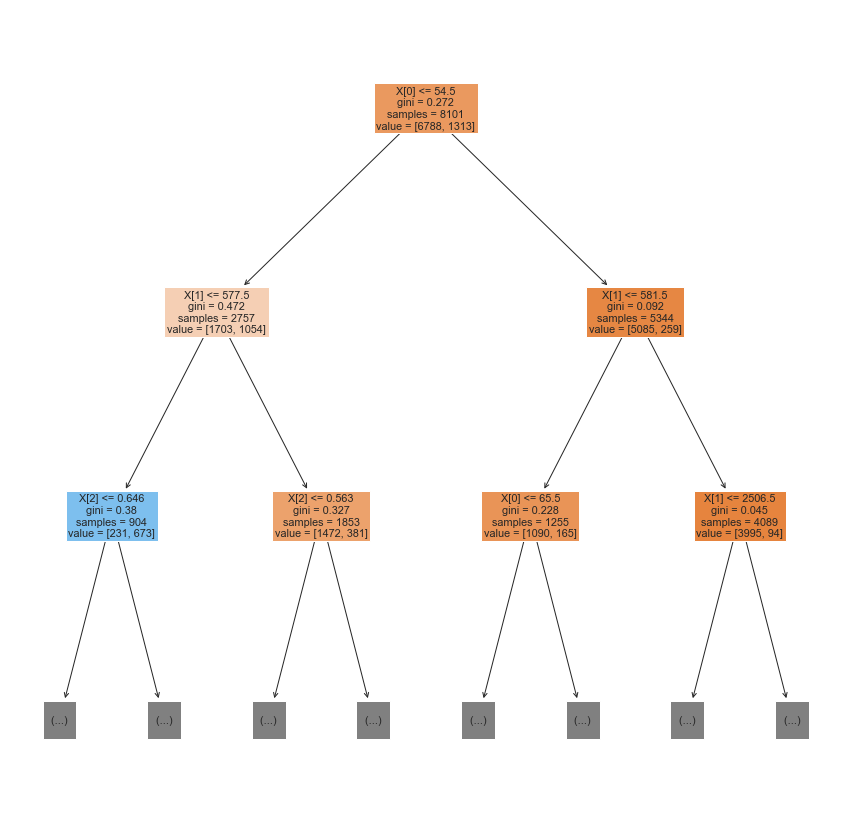

In [54]:
fig=plt.figure(figsize=(15,15))
_=tree.plot_tree(model_tree,
                filled=True,
                max_depth=2)

In [55]:
y_pred_tree=model_tree.predict(X_test)

In [56]:
model_tree.score(X_test, y_test)

0.8790720631786771

In [57]:
confusion_matrix(y_test, y_pred_tree)

array([[1613,   99],
       [ 146,  168]], dtype=int64)

In [58]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_tree)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_tree)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_tree)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_tree)))

Accuracy Score : 0.8790720631786771
Precision Score : 0.6292134831460674
Recall Score : 0.535031847133758
F1 Score : 0.5783132530120482


#### Random Forest:

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=5, criterion='gini')
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8835143139190523

In [62]:
y_pred_rf = rf.predict(X_test)

In [63]:
confusion_matrix(y_test, y_pred_rf)

array([[1609,  103],
       [ 133,  181]], dtype=int64)

In [64]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf)))

Accuracy Score : 0.8835143139190523
Precision Score : 0.6373239436619719
Recall Score : 0.5764331210191083
F1 Score : 0.6053511705685618


####  XGBOOST

In [66]:
from xgboost import XGBClassifier

In [67]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

C:\Users\axels\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8963474827245804

In [68]:
y_pred_boost = xg.predict(X_test)

In [69]:
confusion_matrix(y_test, y_pred_boost)

array([[1622,   90],
       [ 120,  194]], dtype=int64)

In [70]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_boost)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_boost)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_boost)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_boost)))

Accuracy Score : 0.8963474827245804
Precision Score : 0.6830985915492958
Recall Score : 0.6178343949044586
F1 Score : 0.6488294314381271


##### Compensating imbalanced classes with oversampling

In [71]:
oversample=RandomOverSampler(sampling_strategy=0.5)
X_train_over, y_train_over=oversample.fit_resample(X_train, y_train)

In [72]:
X_train_over=pd.DataFrame(X_train_over, columns=X_train.columns)

#####  K-FOLD Validation:

In [175]:
from sklearn.model_selection import KFold, cross_validate

In [176]:
folds= KFold(n_splits=4, shuffle=True, random_state=1)
metricas=['accuracy', 'recall', 'precision', 'f1']
modelos=[LogisticRegression(), 
        KNeighborsClassifier(n_neighbors=5),
        DecisionTreeClassifier(criterion='gini', max_depth=10),
        RandomForestClassifier(n_estimators=5, criterion='gini'),
        XGBClassifier()
        
    
]

In [177]:
for modelo in modelos:
    
    fold=KFold(n_splits=4, random_state=1, shuffle=True)
    scores=cross_validate(modelo,
                         X_train_over,
                         y_train_over,
                         scoring=metricas,
                         cv=fold,
                         n_jobs=-1)
    
    print(str(modelo), '\n')
    print('Accuracy:', scores['test_accuracy'].mean())
    print('Accuracy:', scores['test_accuracy'])
    print('Recall:', scores['test_recall'].mean())
    print('Precision:', scores['test_precision'].mean())
    print('F1:', scores['test_f1'].mean())
    print('----------------------- \n')

LogisticRegression() 

Accuracy: 0.8078694014231896
Accuracy: [0.79531185 0.80912516 0.81665969 0.81038091]
Recall: 0.645144228357603
Precision: 0.7436675270015091
F1: 0.6907622474987035
----------------------- 

KNeighborsClassifier() 

Accuracy: 0.8501465048137296
Accuracy: [0.84386773 0.8560067  0.85349519 0.84721641]
Recall: 0.8025396558095527
Precision: 0.7608868701984143
F1: 0.7811294104094038
----------------------- 

DecisionTreeClassifier(max_depth=10) 

Accuracy: 0.8777731268313103
Accuracy: [0.87526162 0.87944747 0.87902888 0.87735454]
Recall: 0.8072893831909855
Precision: 0.8226918469338136
F1: 0.8148494349062001
----------------------- 

RandomForestClassifier(n_estimators=5) 

Accuracy: 0.9154457932189201
Accuracy: [0.90874843 0.91670155 0.91460862 0.92172457]
Recall: 0.9116240465987423
Precision: 0.8465600754866766
F1: 0.8777873066255678
----------------------- 

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, col

There is an improvement with the balancing of classes

#### Grid Search for Logistic Regression and Random Forest

In [76]:
from sklearn.model_selection import GridSearchCV

In [73]:
#Splits again to get x_validation for the GridSearch

X_train, X_val, y_train, y_val = train_test_split(X_train_over, y_train_over, test_size=0.25, random_state=1) # 0.8 x 0.25 = 0.2

##### Logistic Regression:

In [77]:
params={'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag']}

In [78]:
grid = GridSearchCV(logist,param_grid=params)


In [79]:
grid.fit(X_val, y_val)

C:\Users\axels\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\axels\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\axels\Anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']})

In [80]:
grid.score(X_test, y_test)

0.8627838104639685

In [81]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.810):
{'penalty': 'l2', 'solver': 'lbfgs'}


In [82]:
log_grs = LogisticRegression(penalty='l2',solver='lbfgs')
log_grs.fit(X_train,y_train)

C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
log_grs.score(X_test, y_test)

0.859822309970385

In [84]:
y_pred_test =log_grs.predict(X_test)

In [85]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_test)))

Accuracy Score : 0.859822309970385
Precision Score : 0.5398936170212766
Recall Score : 0.6464968152866242
F1 Score : 0.5884057971014492


#### Random Forest

In [86]:
params_rf = {'criterion':['gini', 'entropy'],'n_estimators':[5,10,20,50,75,100],'max_depth':[None,1,2,3]}

In [87]:
grid2 = GridSearchCV(clf,param_grid=params_rf)


In [88]:
grid2.fit(X_val, y_val)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'n_estimators': [5, 10, 20, 50, 75, 100]})

In [89]:
grid2.score(X_test, y_test)

0.8687068114511353

In [90]:
print("Best parameter (CV score=%0.3f):" % grid2.best_score_)
print(grid2.best_params_)

Best parameter (CV score=0.881):
{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}


In [91]:
rf_grs = RandomForestClassifier(criterion='gini',max_depth=None,n_estimators=100)
rf_grs.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
y_pred_test =rf_grs.predict(X_test)

In [93]:
rf_grs.score(X_test, y_test)

0.8919052319842053

In [94]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_test)))

Accuracy Score : 0.8919052319842053
Precision Score : 0.6452599388379205
Recall Score : 0.6719745222929936
F1 Score : 0.6583463338533541


#### ROC Curves of KNN, XGBClassifiers and Logistic Regression, RandomForest with GridSearch

In [95]:
modelos=[KNeighborsClassifier(n_neighbors=5),
        LogisticRegression(penalty='l2',solver='lbfgs'),
        RandomForestClassifier(criterion='gini',max_depth=None,n_estimators=100),
        XGBClassifier()
        
    
]

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [97]:
def plot_roc_curve_2(fpr, tpr):
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    for i  in range(0, len(fpr)):
        plt.plot(fpr[i], tpr[i], label=str(modelos[i])[:10]) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


  KNeighborsClass    

0.9732221824433496

  LogisticRegress    

0.8575416807156307


C:\Users\axels\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



  RandomForestCla    

0.9996139066861728
[18:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\axels\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



  XGBClassifier(b    

0.989485305275454


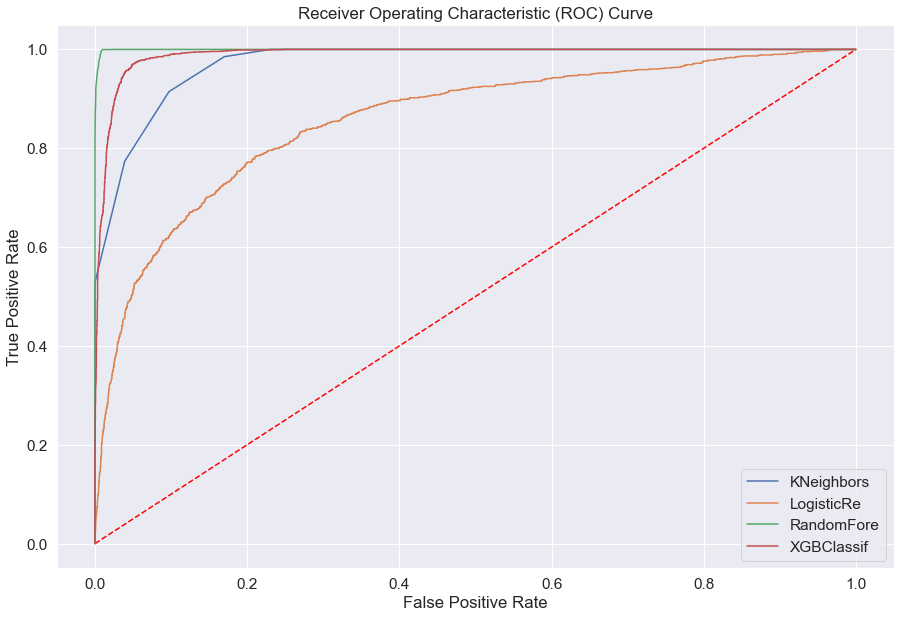

In [98]:
fpr_list=[]
tpr_list=[]

for i in range(0, len(modelos)):
    modelo=modelos[i]
    
    
    modelo.fit(X_train_over, y_train_over)
    probs = modelo.predict_proba(X_train_over)
    probs = probs[:,1]
    fpr, tpr, umbral = roc_curve(y_train_over, probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    print('\n \033[1m', str(modelo)[:15], '  \033[0;0m \n')
    print(roc_auc_score(y_train_over, probs))
plot_roc_curve_2(fpr_list, tpr_list)

#### Explaining Random Forest with Shap

In [99]:
import shap

In [226]:
explainer = shap.TreeExplainer(rf_grs)
shap_values = explainer.shap_values(X)

100%|===================| 1999/2000 [07:37<00:00]        

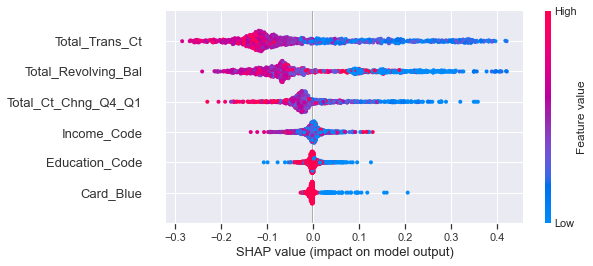

In [110]:
feature_names = ['Total_Trans_Ct','Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Income_Code','Card_Blue','Education_Code']
df_tmp = pd.DataFrame(X_test, columns=feature_names)

masker = shap.maskers.Independent(df_tmp, max_samples=1000)
explainer = shap.TreeExplainer(rf_grs, masker)

# shap_values.values.shape ==  (10000, 41, 2)
# shap_values[1].values.shape == (41, 2)
shap_values = explainer(df_tmp.sample(1000, random_state=69),check_additivity=False)

# tmp.values.shape == tmp.data.shape == (10000, 41)
# I took all observations for all features just for positive prediction result
tmp = shap.Explanation(shap_values[:, :, 1], data=df_tmp, feature_names=feature_names)

# now both plots work
shap.plots.beeswarm(tmp)
#shap.summary_plot(tmp)

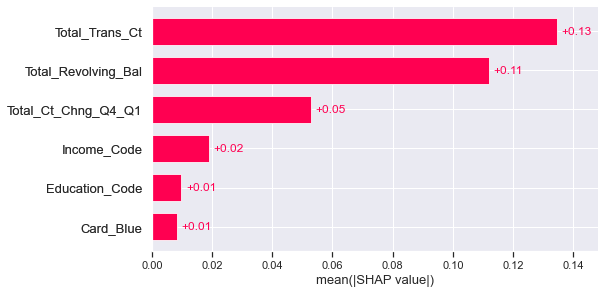

In [136]:
shap.plots.bar(tmp)

It's seen that the columns with data from the customer's activity are the ones that have the biggest weights in the different branches of the random forest